In [3]:
import acquire

In [2]:
df = acquire.get_titanic_data()

In [4]:
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, Imputer

In [4]:
df_iris = acquire.get_iris_data()

In [7]:
# Drop the species_id and measurement_id columns.
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
measurement_id    150 non-null int64
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_id        150 non-null int64
species_id        150 non-null int64
species_name      150 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


In [9]:
df_iris.drop(['species_id','measurement_id'],inplace=True,axis=1)

In [13]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df_iris = df_iris.rename(columns={"species_name": "species"})

In [ ]:
# Encode the species name using a sklearn label encoder. 
# Research the inverse_transform method of the label encoder. How might this be useful?

In [14]:
#No nulls
df_iris.species.value_counts(dropna=False)

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [16]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
labelencoder = LabelEncoder()

In [18]:
labelencoder.fit(df_iris.species)

LabelEncoder()

In [20]:
df_iris.species = labelencoder.transform(df_iris.species)

In [24]:
df_iris.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [27]:
def prep_iris():
    df_iris = acquire.get_iris_data()
    df_iris.drop(['species_id','measurement_id'],inplace=True,axis=1)
    df_iris = df_iris.rename(columns={"species_name": "species"})
    
    labelencoder = LabelEncoder()
    labelencoder.fit(df_iris.species)
    df_iris.species = labelencoder.transform(df_iris.species)
    return df_iris

In [28]:
blob = prep_iris()

In [30]:
blob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [5]:
df_titanic = acquire.get_titanic_data()

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
#Handle the missing values in the embark_town and embarked columns.

In [32]:
df_titanic.embark_town.fillna('Other', inplace=True)

In [42]:
df.embark_town.fillna('Other', inplace=True)

In [45]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Other            2
Name: embark_town, dtype: int64

In [49]:
df_titanic.drop('deck', inplace=True, axis=1)

In [51]:
lab_enc = LabelEncoder()

In [52]:
df_titanic.embarked.fillna('Unknown', inplace=True)

In [54]:
lab_enc.fit(df_titanic.embarked)

LabelEncoder()

In [55]:
df_titanic.embarked = lab_enc.transform(df_titanic.embarked)

In [57]:
df_titanic.embarked.head()

0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64

In [59]:
scaler = MinMaxScaler()

In [60]:
scaler.fit(df_titanic[['fare']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [63]:
df_titanic.fare = scaler.transform(df_titanic[['fare']])

In [65]:
df_titanic.fare.head()

0    0.014151
1    0.139136
2    0.015469
3    0.103644
4    0.015713
Name: fare, dtype: float64

In [66]:
scaler2 = MinMaxScaler()

In [67]:
scaler2.fit(df_titanic[['age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [68]:
df_titanic.age = scaler.transform(df_titanic[['age']])

In [1]:
import prepare

In [2]:
iris_df = prepare.prep_iris()

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
import prepare

In [12]:
df_titanic, enc = prepare.prep_titanic()

In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        891 non-null int64
class           891 non-null object
embark_town     891 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [14]:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

imputer = imputer.fit(df_titanic[['age']])

df_titanic['age'] = imputer.transform(df_titanic[['age']])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
df_titanic.age.isnull().sum()

0

In [16]:
import seaborn as sns

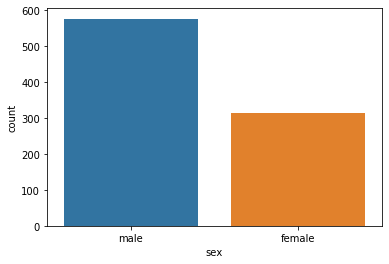

In [21]:
sns.countplot(data=df_titanic, x='sex', )

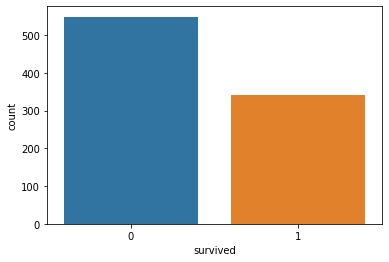

In [34]:
sns.countplot(x=df_titanic.survived)

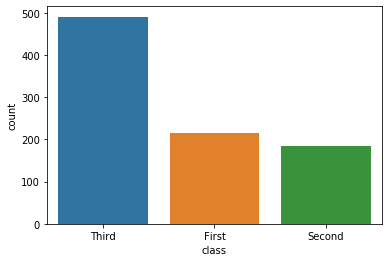

In [24]:
sns.countplot(x='class',data=df_titanic)

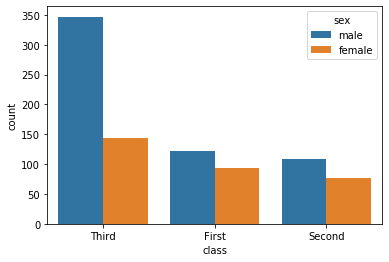

In [25]:
sns.countplot(x='class',data=df_titanic, hue='sex')

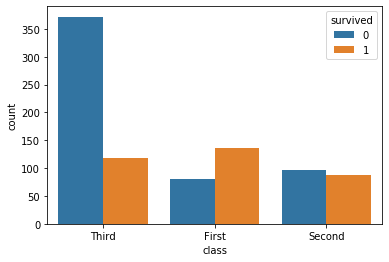

In [26]:
sns.countplot(x='class', data=df_titanic, hue='survived')

In [28]:
#sns.boxplot(x='class', y='age', data=df)
#sns.boxplot(x='class', y='')

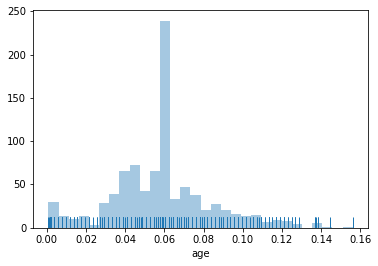

In [30]:
sns.distplot(df_titanic.age, kde=False, rug=True);

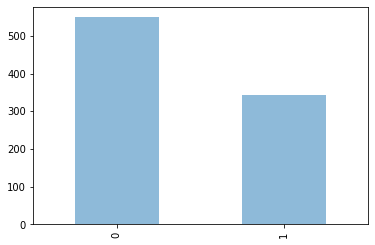

In [33]:
df_titanic.survived.value_counts().plot(kind = 'bar', alpha=.5)

In [35]:
discretes = df_titanic.select_dtypes(include='object')

In [36]:
discretes.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [38]:
list(discretes.columns)

['sex', 'class', 'embark_town']

In [58]:
# Iterate over the sequence of column names
for column in discretes:
   # Select column contents by column name using [] operator
   columnSeriesObj = discretes[column]
   print('Colunm Name : ', column)
   print('Unique Values : ', columnSeriesObj.unique())
   temp = []
   print(len(columnSeriesObj.unique()))
   if len(columnSeriesObj.unique) < 9:
       
temp.append(columnSeriesObj.unique)
   temp

Colunm Name :  sex
Unique Values :  ['male' 'female']
2


TypeError: object of type 'method' has no len()

In [47]:
# Iterate over the sequence of column names
def blob():

    for column in discretes:
       # Select column contents by column name using [] operator
       columnSeriesObj = discretes[column]
       print('Colunm Name : ', column)
       print('Unique Values : ', columnSeriesObj.unique())
       temp = []
       print(len(columnSeriesObj.unique()))
       if len(columnSeriesObj.unique) < 5:
           temp.append(columnSeriesObj.unique)
       return temp

In [134]:
def pick_viable_categories():
    discretes = df_titanic.select_dtypes(include='object')
    temp = []
    for column in discretes:
        columnSeriesObj = discretes[column]
        if len(columnSeriesObj.unique()) < 4:
            temp.append(columnSeriesObj.name)
    return temp

In [135]:
for i in discretes:
    print(i)

sex
class
embark_town


In [136]:
x = pick_viable_categories()

In [137]:
x

['sex', 'class']

array(['male', 'female'], dtype=object)

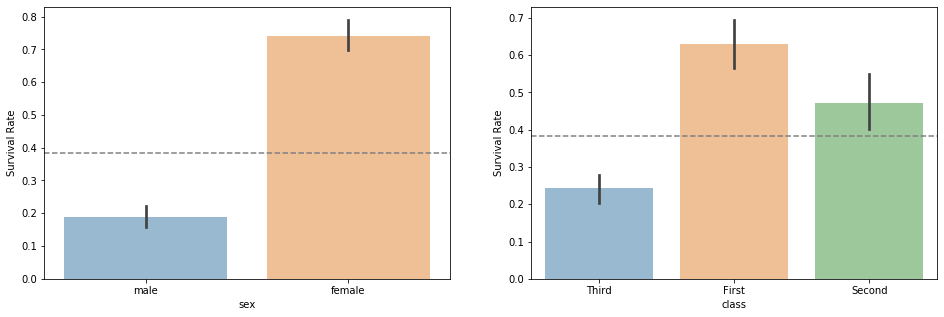

In [139]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=len(x), figsize=(16,5))

survival_rate = df_titanic.survived.mean()

for i, feature in enumerate(x):
    sns.barplot(feature, 'survived', data=df_titanic, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [140]:
def plot_viable_categories():
    x = pick_viable_categories()
    _, ax = plt.subplots(nrows=1, ncols=len(x), figsize=(16,5))
    survival_rate = df_titanic.survived.mean()
    for i, feature in enumerate(x):
        sns.barplot(feature, 'survived', data=df_titanic, ax=ax[i], alpha=.5)
        ax[i].set_ylabel('Survival Rate')
        ax[i].axhline(survival_rate, ls='--', color='grey')

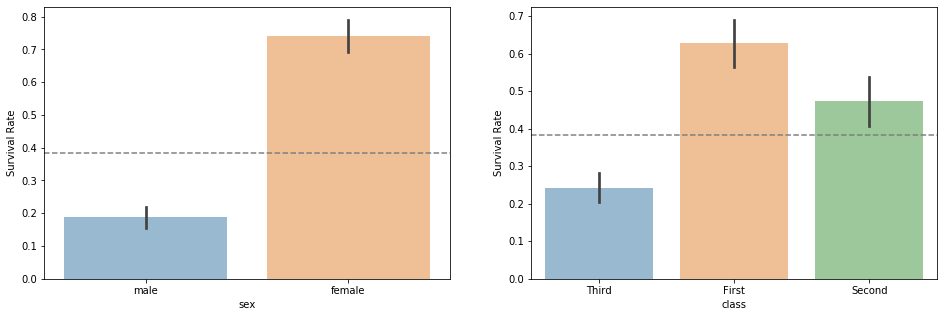

In [141]:
plot_viable_categories()

In [142]:
def pick_viable_regressors():
    regressors = df_titanic.select_dtypes(include=['float64','int64'])
    temp = []
    for column in discretes:
        columnSeriesObj = discretes[column]
        temp.append(columnSeriesObj.name)
    return temp

In [143]:
spam = pick_viable_regressors()

In [144]:
spam

['passenger_id',
 'survived',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'alone']

In [148]:
regressors = df_titanic.select_dtypes(include=['float64','int64'])
regressors.drop('passenger_id', inplace=True, axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


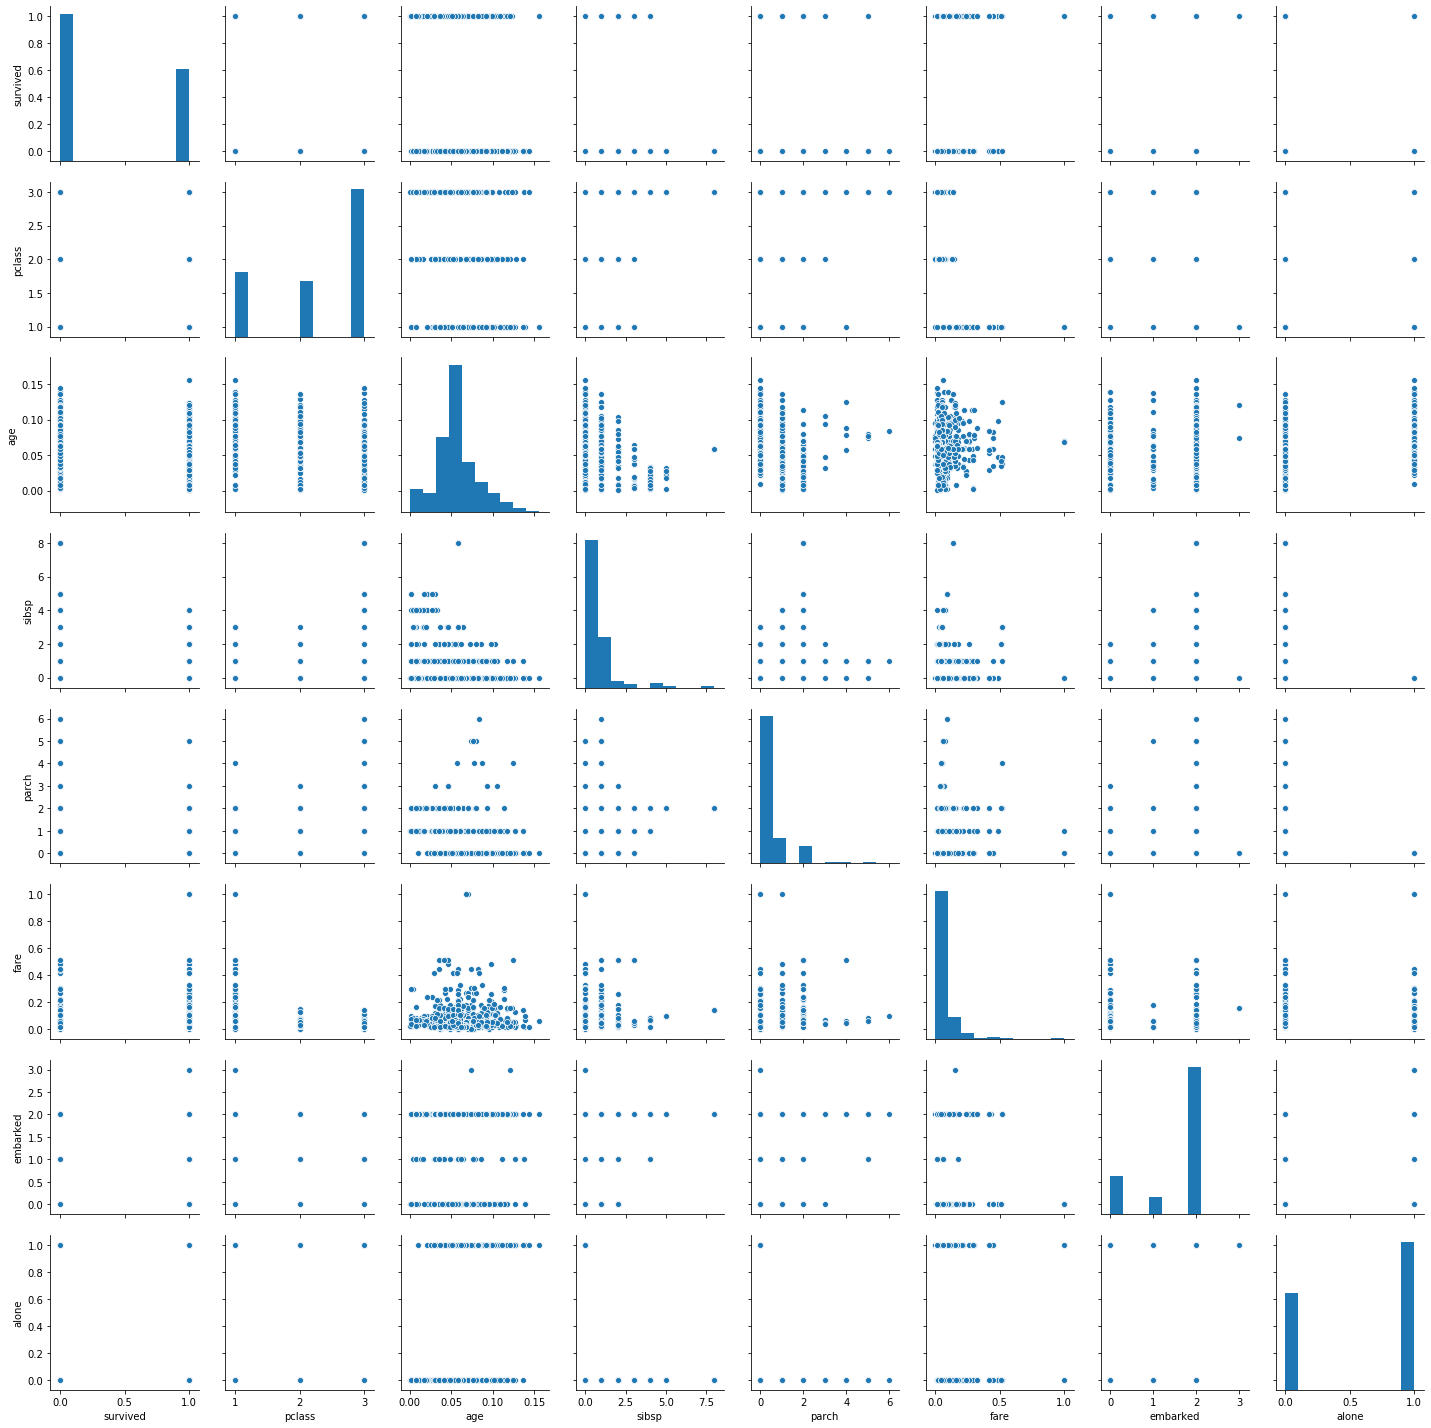

In [149]:
sns.pairplot(data = regressors)

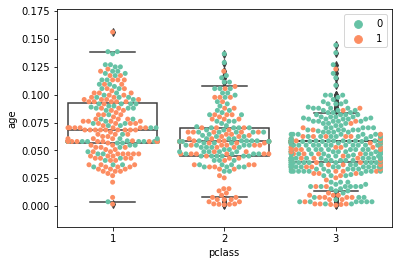

In [150]:
sns.swarmplot(x="pclass", y="age", data=df_titanic, hue="survived", palette="Set2")
ax = sns.boxplot(x="pclass", y="age", data=df_titanic,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})
plt.legend(loc=1)

In [ ]:
def plot_viable_categories():
    x = pick_viable_categories()
    y
    _, ax = plt.subplots(nrows=1, ncols=len(x), figsize=(16,5))
    survival_rate = df_titanic.survived.mean()
    for i, feature in enumerate(x):
        sns.barplot(feature, 'survived', data=df_titanic, ax=ax[i], alpha=.5)
        ax[i].set_ylabel('Survival Rate')
        ax[i].axhline(survival_rate, ls='--', color='grey')

In [ ]:
discretes = df_titanic.select_dtypes(include='object')
discretes['age'] = df_titanic['age']

#make axis before making chart in each step of for loop through columns in the discretes DF
 _, ax = plt.subplots(nrows=1, ncols=len(discretes), figsize=(16,5)) 

    #Each step of loop makes bar chart
for i, features in enumerate(discretes):
    _, ax = plt.subplots(nrows=1, ncols=len(discretes), figsize=(16,5))    
    sns.barplot('age', features, data=discretes, ax=ax[i], alpha=.5)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
for i, features in enumerate(discretes):
    print(i, features)

0 sex
1 class
2 embark_town


In [27]:
def plot_viable_categories(target, df):
    x = pick_viable_categories(df)
    _, ax = plt.subplots(nrows=1, ncols=len(x), figsize=(16,5))
    average_rate = df[target].mean()
    for i, feature in enumerate(x):
        sns.barplot(feature, target, data=df_titanic, ax=ax[i], alpha=.5)
        ax[i].set_ylabel(f'{target} rate')
        ax[i].axhline(average_rate, ls='--', color='grey')

In [44]:
def pick_viable_categories(df):
    discretes = df.select_dtypes(include=['object','int64'])
    temp = []
    for column in discretes:
        columnSeriesObj = discretes[column]
        if len(columnSeriesObj.unique()) < 5:
            temp.append(columnSeriesObj.name)
    return temp

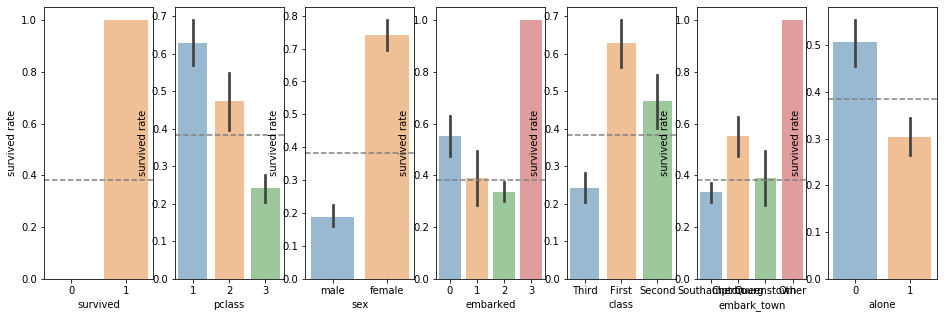

In [45]:
plot_viable_categories('survived', df_titanic)

In [29]:
def pick_viable_regressors(df):
    regressors = df.select_dtypes(include=['float64','int64'])
    temp = []
    for column in regressors:
        columnSeriesObj = regressors[column]
        temp.append(columnSeriesObj.name)
    return temp

In [30]:
pick_viable_regressors(df_titanic)

['passenger_id',
 'survived',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'alone']

In [34]:
def plot_viable_regressors(target, df):
    x = pick_viable_regressors(df)
    _, ax = plt.subplots(nrows=1, ncols=len(x), figsize=(16,5))
    average_rate = df[target].mean()
    for i, feature in enumerate(x):
        sns.violinplot(feature, target, data=df, ax=ax[i], alpha=.5)
        ax[i].set_ylabel('average_rate')
        ax[i].axhline(average_rate, ls='--', color='grey')

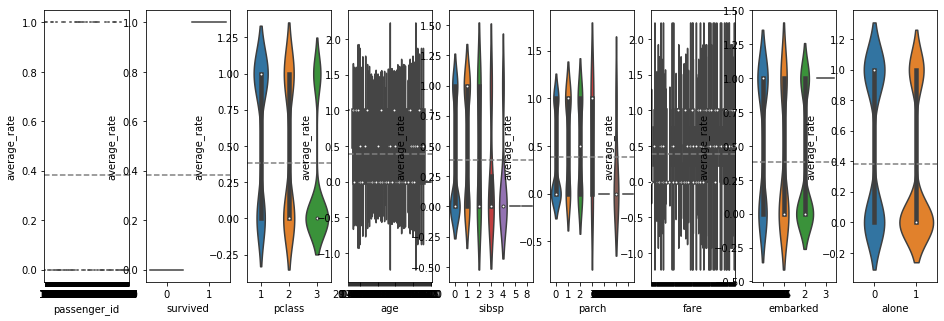

In [35]:
plot_viable_regressors('survived', df_titanic)

In [36]:
def plot_viable_regressors(target, df):
    x = pick_viable_regressors(df)
    _, ax = plt.subplots(nrows=len(x), ncols=1, figsize=(16,5))
    average_rate = df[target].mean()
    for i, feature in enumerate(x):
        sns.violinplot(feature, target, data=df, ax=ax[i], alpha=.5)
        ax[i].set_ylabel('average_rate')
        ax[i].axhline(average_rate, ls='--', color='grey')

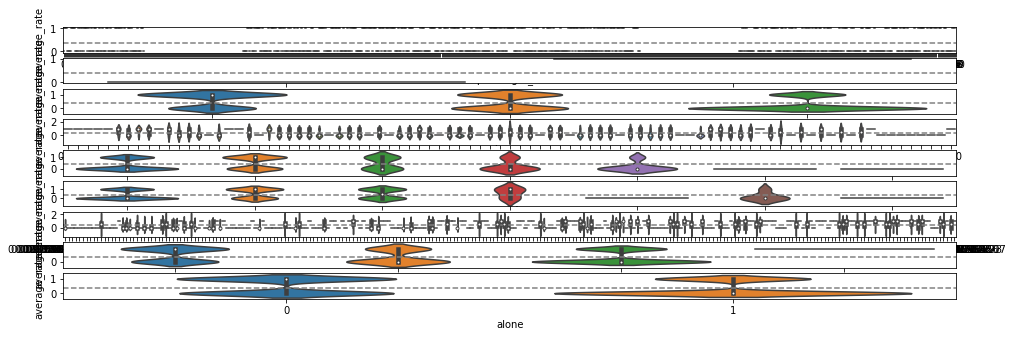

In [37]:
plot_viable_regressors('survived', df_titanic)

In [56]:
def plot_violin(target, df):
    discretes = pick_viable_categories(df)
    contins = pick_viable_regressors(df)
    for i in contins:
        for j in discretes:
            sns.violinplot(i, j, hue=target, data=df, palette=['blue','orange'])
            plt.title(i + ' x ' + j)
            plt.ylabel(i)
            plt.show()

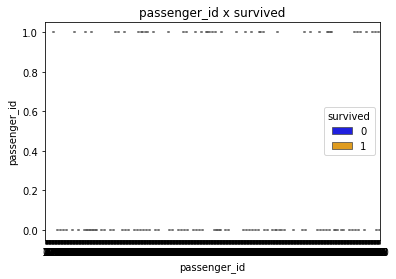

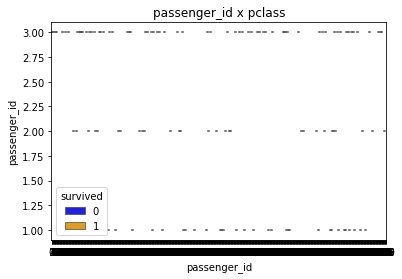

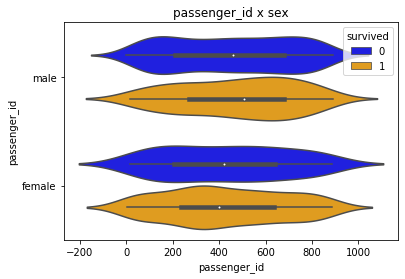

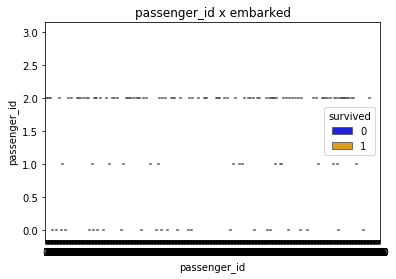

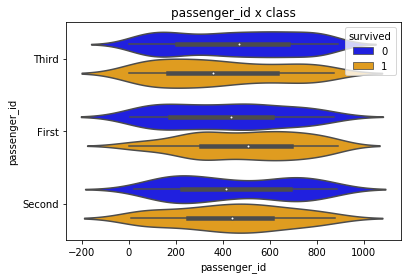

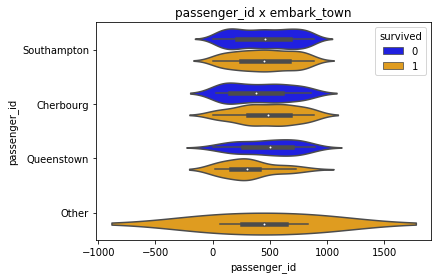

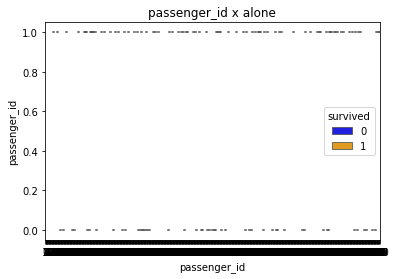

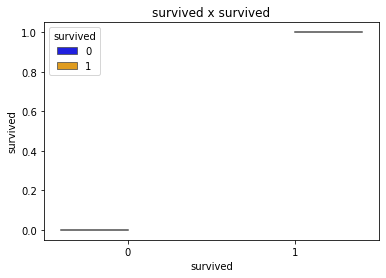

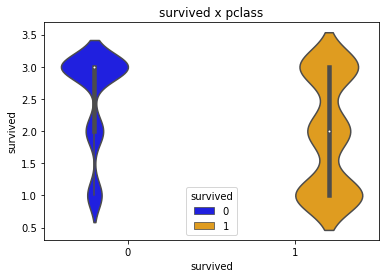

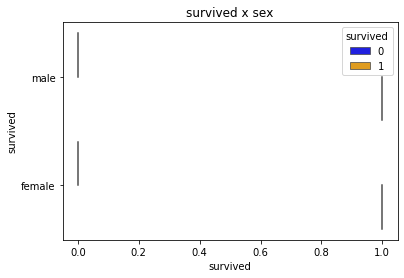

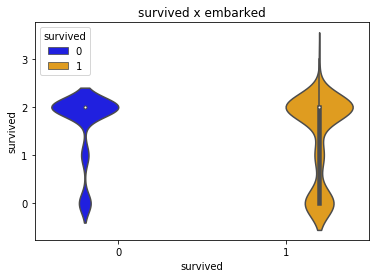

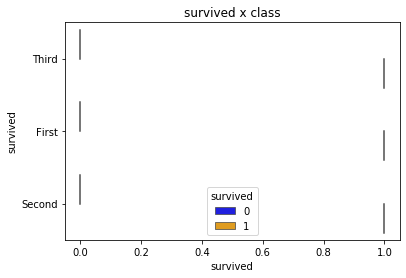

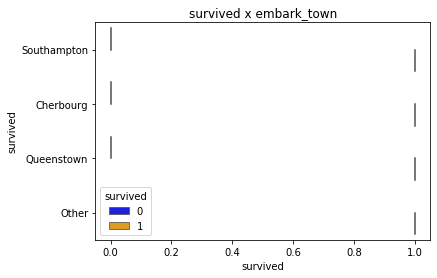

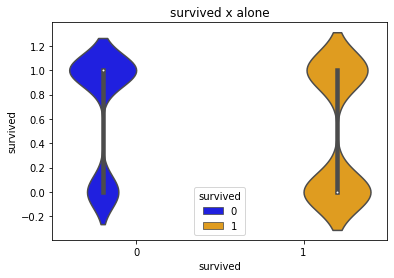

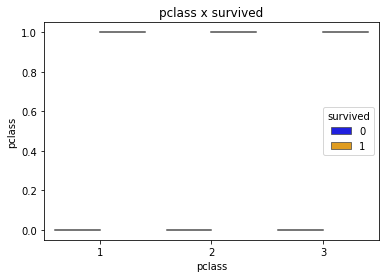

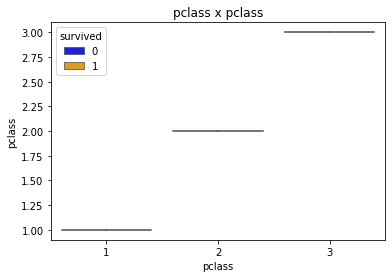

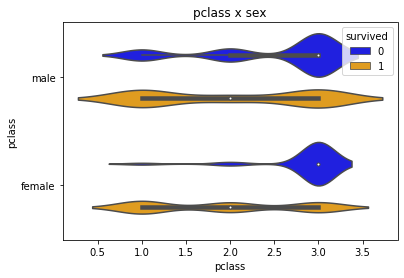

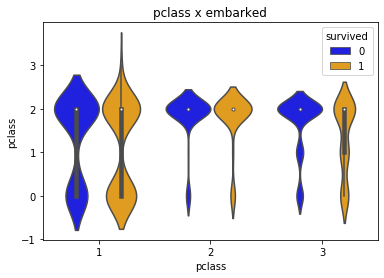

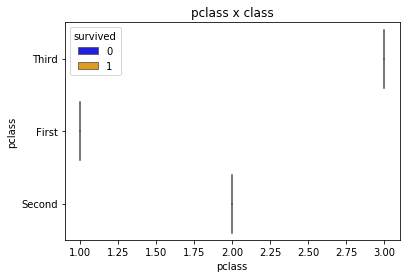

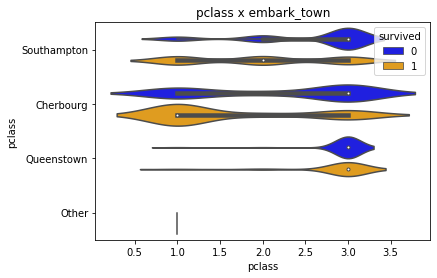

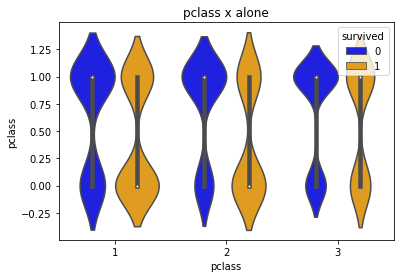

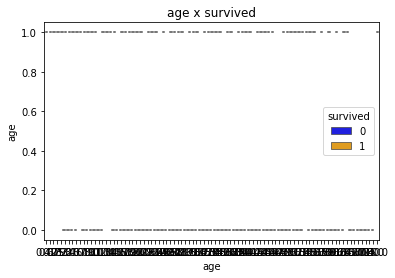

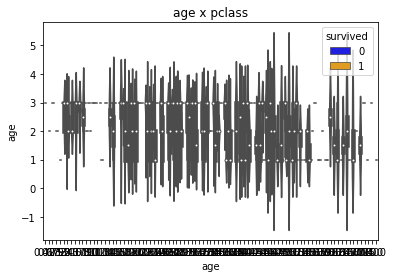

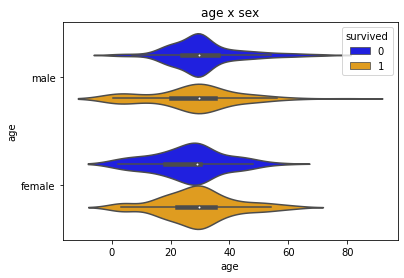

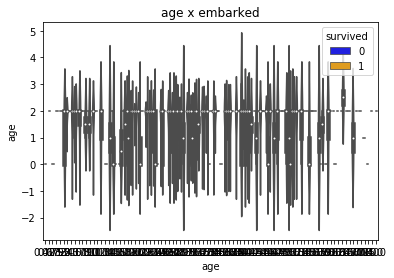

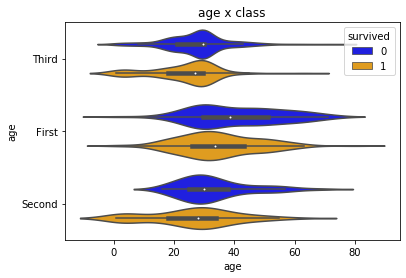

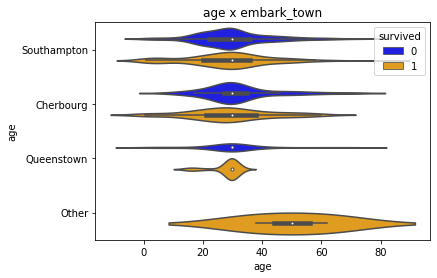

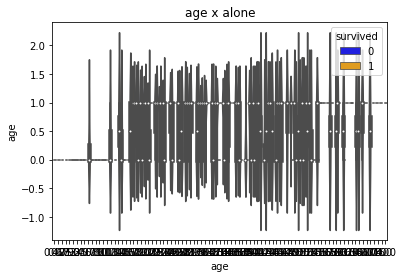

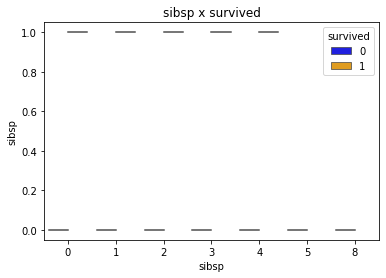

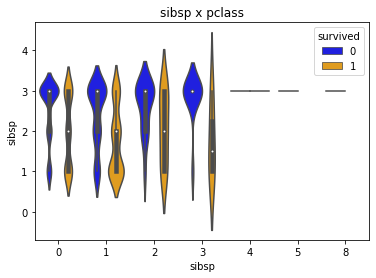

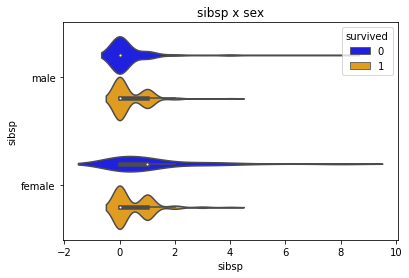

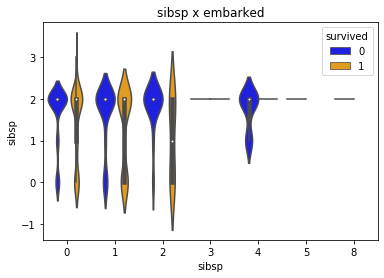

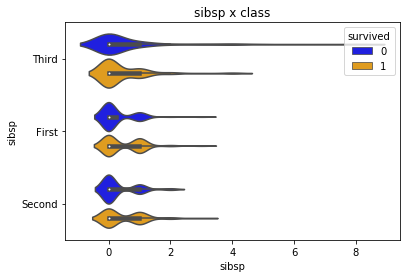

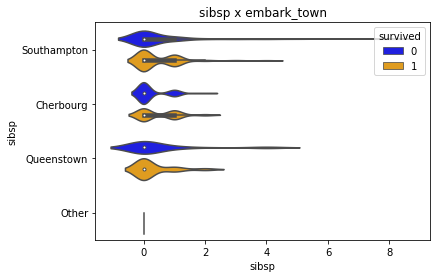

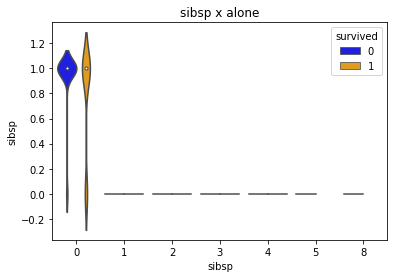

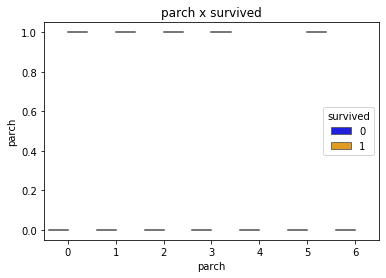

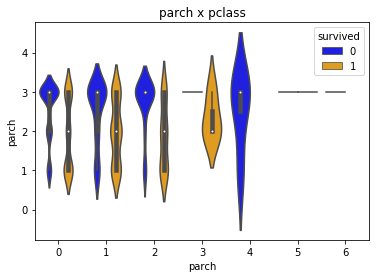

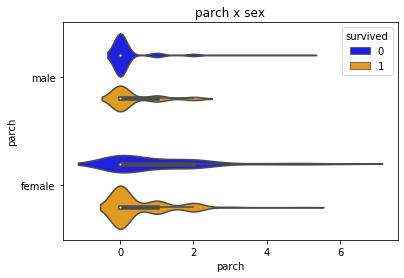

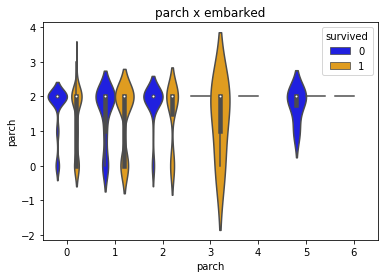

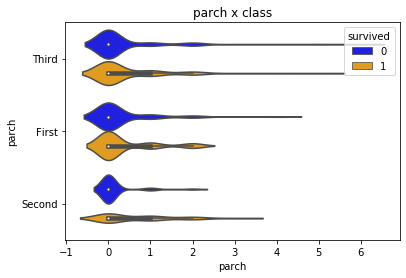

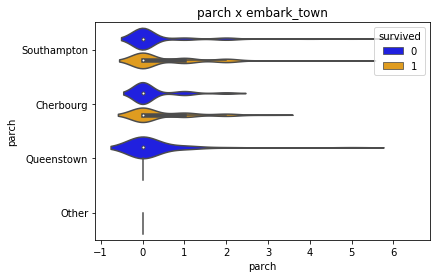

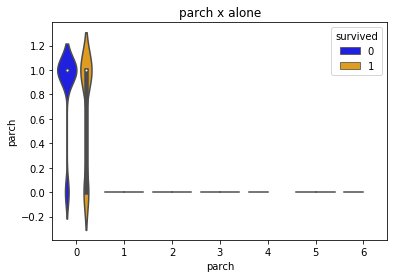

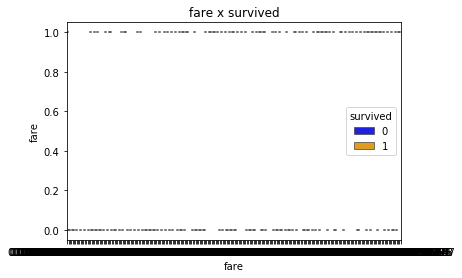

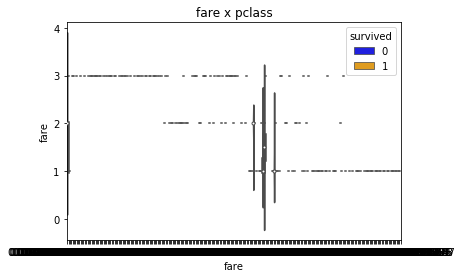

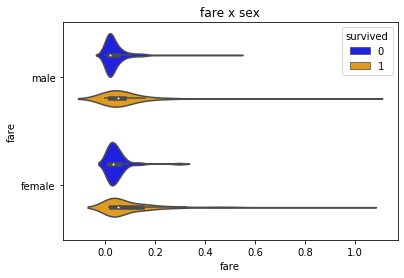

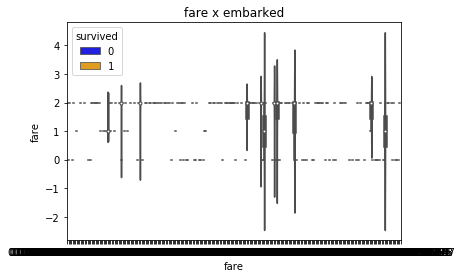

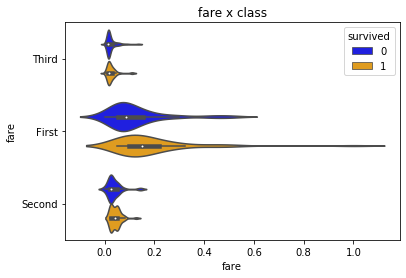

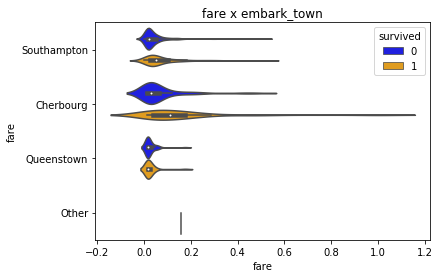

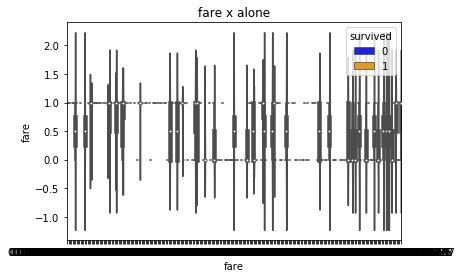

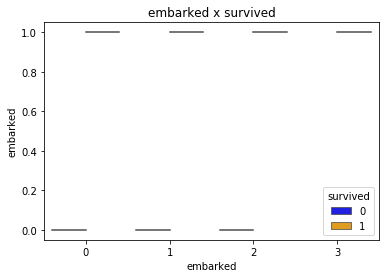

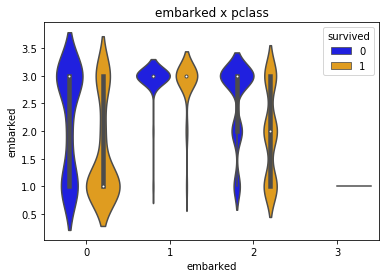

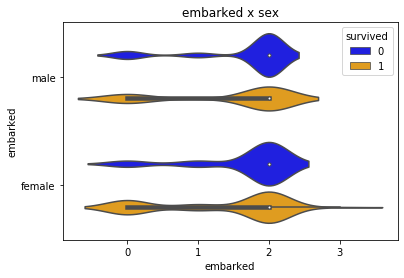

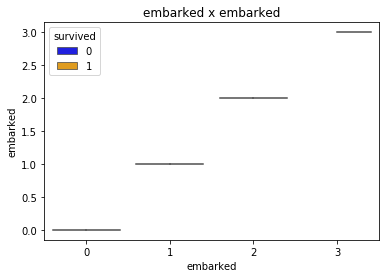

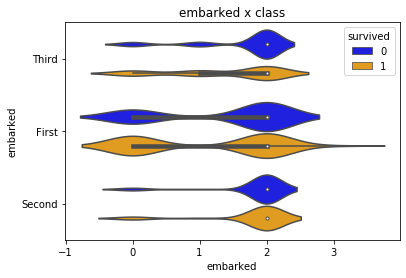

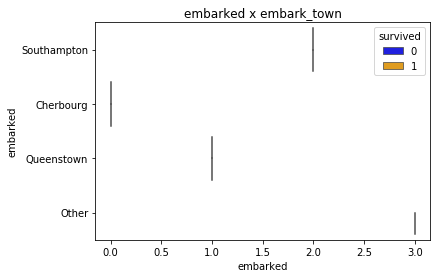

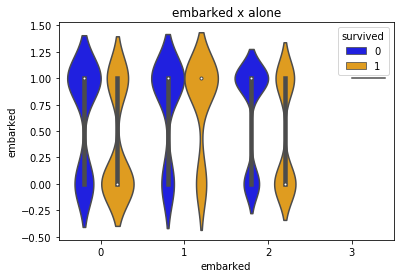

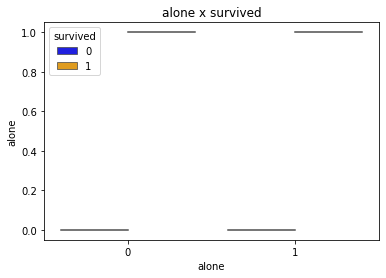

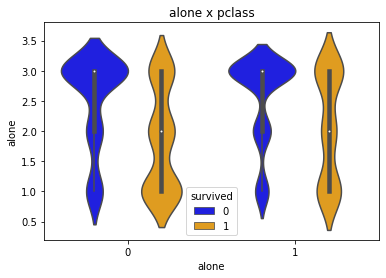

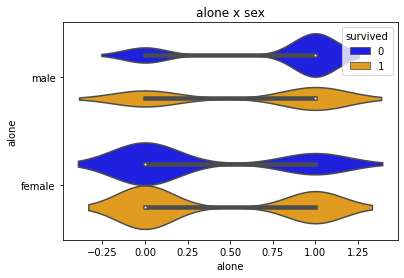

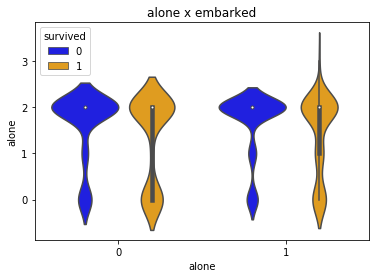

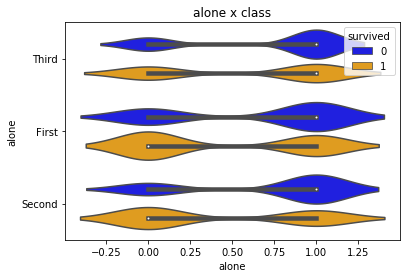

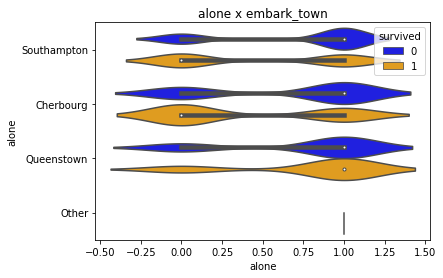

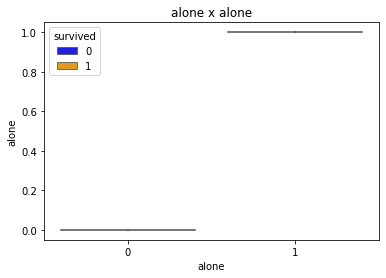

In [57]:
plot_violin('survived', df_titanic)